Import all necessary libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

Read CSV

In [6]:
path = '/content/AH_Excess_Deaths_by_Sex__Age__and_Race_and_Hispanic_Origin.csv'
df = pd.read_csv(path)
df.head()

,AnalysisDate,Time Period,MMWRyear,MMWRweek,Weekending,RaceEthnicity,Sex,AgeGroup,Deaths (weighted),COVID19 (weighted),Deaths (unweighted),COVID19 (unweighted),Average number of deaths (weighted),Average number of deaths (unweighted),Number above average (weighted),Percent above average (weighted),Number above average (unweighted),Percent above average (unweighted),Footnote,Geography
0,04/23/2023,2015-2019,2015.0,1.0,01/10/2015,All Race/Ethnicity Groups,All Sexes,0-14 Years,624.0,0.0,624.0,0.0,615.0,615.0,NaN,NaN,NaN,NaN,NaN,United States
1,04/23/2023,2015-2019,2016.0,1.0,01/09/2016,All Race/Ethnicity Groups,All Sexes,0-14 Years,617.0,0.0,617.0,0.0,615.0,615.0,NaN,NaN,NaN,NaN,NaN,United States
2,04/23/2023,2015-2019,2017.0,1.0,01/07/2017,All Race/Ethnicity Groups,All Sexes,0-14 Years,614.0,0.0,614.0,0.0,615.0,615.0,NaN,NaN,NaN,NaN,NaN,United States
3,04/23/2023,2015-2019,2018.0,1.0,01/06/2018,All Race/Ethnicity Groups,All Sexes,0-14 Years,634.0,0.0,634.0,0.0,615.0,615.0,NaN,NaN,NaN,NaN,NaN,United States
4,04/23/2023,2015-2019,2019.0,1.0,01/05/2019,All Race/Ethnicity Groups,All Sexes,0-14 Years,586.0,0.0,586.0,0.0,615.0,615.0,NaN,NaN,NaN,NaN,NaN,United States


In [7]:
selected_columns = ['MMWRyear', 'AgeGroup', 'Deaths (unweighted)', 'Geography']
df = df[selected_columns]
print(df.head())

   MMWRyear    AgeGroup  Deaths (unweighted)      Geography
0    2015.0  0-14 Years                624.0  United States
1    2016.0  0-14 Years                617.0  United States
2    2017.0  0-14 Years                614.0  United States
3    2018.0  0-14 Years                634.0  United States
4    2019.0  0-14 Years                586.0  United States


Plot the graph

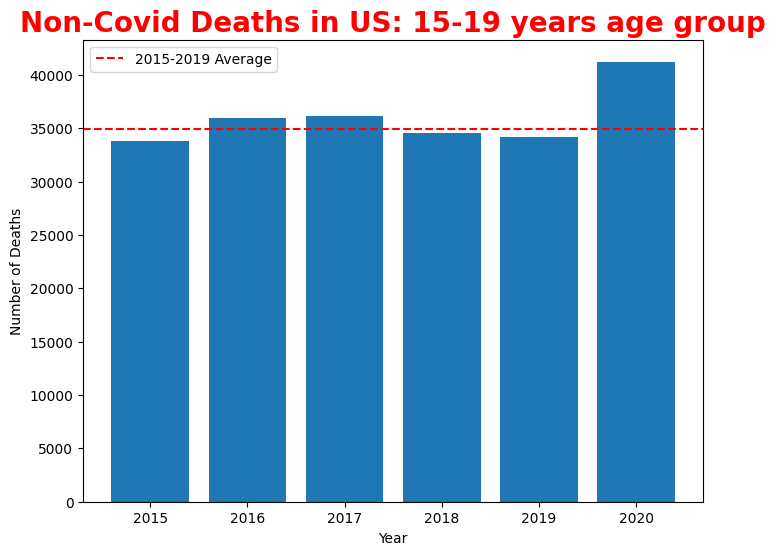

In [8]:
filtered_df = df[(df['Geography'] == 'United States') & (df['AgeGroup'] == '15-19 Years') & (df['MMWRyear'] >= 2015) & (df['MMWRyear'] <= 2020)]
grouped_df = filtered_df.groupby('MMWRyear')['Deaths (unweighted)'].sum().reset_index()

plt.figure(figsize=(8, 6))
bars = plt.bar(grouped_df['MMWRyear'], grouped_df['Deaths (unweighted)'])
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Non-Covid Deaths in US: 15-19 years age group', fontsize=20, color='red', fontweight='bold')
plt.axhline(y=grouped_df['Deaths (unweighted)'].iloc[:-1].mean(), color='r', linestyle='--', label='2015-2019 Average')

plt.legend()
plt.show()